In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, precision_score, recall_score, classification_report

import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bank.csv')
data.shape


(11162, 17)

In [3]:
data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


# Data Dictionary
    # 1. age (numeric).
    # 2. job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","selfemployed","retired","technician","services").
    # 3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed).
    # 4. education (categorical: "unknown","secondary","primary","tertiary").
    # 5. default: has credit in default? (binary: "yes","no").
    # 6. balance: average yearly balance, in euros (numeric) .
    # 7. housing: has housing loan? (binary: "yes","no").
    # 8. loan: has personal loan? (binary: "yes","no")

    # Related with the last contact of the current campaign:
    # 9. contact: contact communication type (categorical: "unknown","telephone","cellular") .
    # 10. day: last contact day of the month (numeric).
    # 11. month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec").
    # 12. duration: last contact duration, in seconds (numeric).
    # 13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact).
    # 14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted).
    # 15. previous: number of contacts performed before this campaign and for this client (numeric).
    # 16. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success").

    -- ** TARGET ** --
    # 17. deposit - has the client subscribed a term deposit? (binary: "yes","no")./


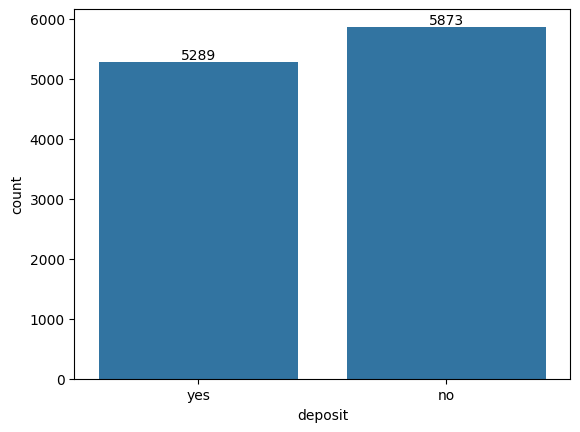

,proportion
deposit,
no,52.62
yes,47.38


In [4]:
# Analyze the target column
ax = sns.countplot(x = data['deposit'])
ax.bar_label(ax.containers[0])
plt.show()

round(data['deposit'].value_counts(normalize = True)*100, 2)

In [5]:
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [6]:
data.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


In [7]:
# number of unique values in each categorical column
for cols in data.columns:
  if data[cols].dtype == 'O':
    print(cols, ':', data[cols].nunique())

job : 12
marital : 3
education : 4
default : 2
housing : 2
loan : 2
contact : 3
month : 12
poutcome : 4
deposit : 2


##Prepare the data for ML model

In [8]:
# label encoding
encoder = LabelEncoder()

for cols in data.columns:
  if data[cols].dtype == 'O':
    data[cols] = encoder.fit_transform(data[cols])

In [9]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [10]:
# dependent and independent split
x = data.drop(['deposit'],axis = 1)
y = data['deposit']

# train test split
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size =0.3, random_state = 42)


In [11]:
# dimension of the split
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(7813, 16) (7813,)
(3349, 16) (3349,)


In [13]:
# No need for data scaling because decision treee uses gini index for comparison of columns

In [42]:
# decision tree model
model = DecisionTreeClassifier(max_depth = 5, random_state = 42)
model.fit(x_train, y_train)
train_score = model.score(x_train, y_train)
print('Training score ', round(train_score*100, 2),'%')


Training score  81.48 %


In [43]:
# prediction
y_pred = model.predict(x_test)
y_pred[:10]

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 1])

In [44]:
np.array(y_test.head(10))

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [45]:
# testing score
print('Testing score ',round(accuracy_score(y_test,y_pred)*100,2),'%')
print('REcall score ',round(recall_score(y_test,y_pred)*100,2),'%')
print('Precision score ',round(precision_score(y_test,y_pred)*100,2),'%')

Testing score  80.44 %
REcall score  80.71 %
Precision score  78.99 %


Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1742
           1       0.79      0.81      0.80      1607

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349



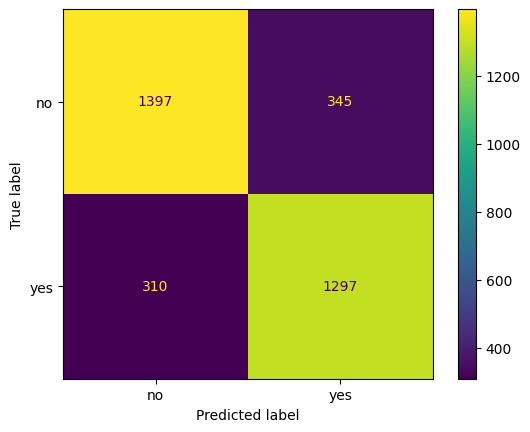

In [37]:
# Confusion matrix for understanding the prediction
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels = ['no','yes'])
print('Classification Report: \n', classification_report(y_test, y_pred))